In [61]:
 ###############################################################################
###
### basic toy example for the SVM in two dimensions
###
### idea: illusrate basic notions and definitions
###
###############################################################################

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

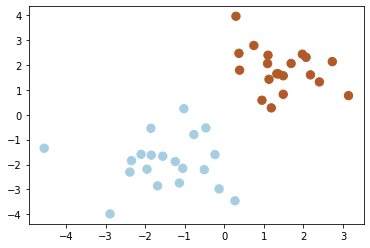

In [62]:
np.random.seed(0)
### 20 points from two Gaussian classes with centroids (-2,-2) and (2,2)
 
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [-1] * 20 + [1] * 20

### plot the points along 
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, s = 70)

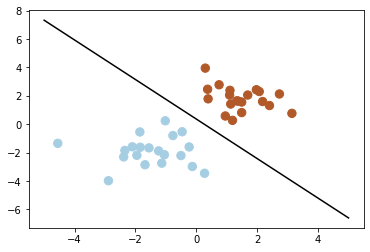

In [64]:
### C -> infty: maximum margin separating plane

hardmargin = svm.SVC(C=1e6, kernel='linear')
hardmargin.fit(X, Y)

### optimal weight vector
w = hardmargin.coef_
w_0 = hardmargin.intercept_

### plot the hyperplane

w = hardmargin.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (hardmargin.intercept_[0]) / w[1]

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, s = 70)
plt.plot(xx, yy, 'k-')

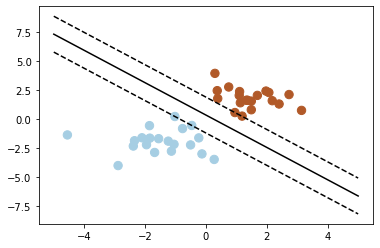

In [65]:
### extract support vectors and plot
svs = hardmargin.support_vectors_

plt.scatter(hardmargin.support_vectors_[:, 0], hardmargin.support_vectors_[:, 1],
            s=160, facecolors='none')

b = hardmargin.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = hardmargin.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, s = 70)
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_up, 'k--')

In [59]:
### now look at the dual solution

hardmargin.dual_coef_ # note that they are all smaller than C (/n) --> scaling factor n is omitted in python

# compute the weight vector from the dual coefficients

svs_indices = hardmargin.support_
#np.tile(np.array(Y)[svs_indices], [2, 1])),
wcheck = np.dot(np.transpose(X[svs_indices,:]), 
                np.transpose(hardmargin.dual_coef_,))

3.173041171327788
-3.202534627085126


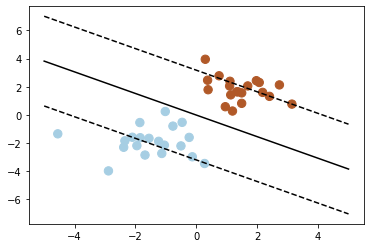

In [72]:
###############################################################################
### now decrease C parameter
###############################################################################

softmargin = svm.SVC(C=1e-2, kernel='linear')
softmargin.fit(X, Y)

### optimal weight vector

w = softmargin.coef_
w_0 = softmargin.intercept_

### plot the hyperplane

w = softmargin.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (softmargin.intercept_[0]) / w[1]

svs = softmargin.support_vectors_

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, s = 70)
plt.scatter(softmargin.support_vectors_[:, 0], softmargin.support_vectors_[:, 1], s=160, facecolors='None')

# find support vectors not violating the margin 

ixplus  = np.where(np.logical_and(softmargin.dual_coef_[0] > 0, softmargin.dual_coef_[0] < 1e-2))
ixminus = np.where(np.logical_and(softmargin.dual_coef_[0] < 0, abs(softmargin.dual_coef_[0]) < 1e-2))

b = np.squeeze(svs[ixplus,])
yy_down = a * xx + (b[1] - a * b[0])

b = np.squeeze(svs[ixminus,])
yy_up = a * xx + (b[1] - a * b[0])

plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_up, 'k--')

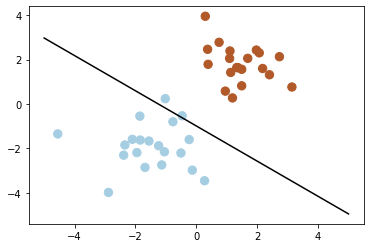

In [75]:
##############################################################################
### decrease C parameter even further
###############################################################################

softmargin = svm.SVC(C=1e-3, kernel='linear')
softmargin.fit(X, Y)

### optimal weight vector

w = softmargin.coef_
w_0 = softmargin.intercept_

### plot the hyperplane

w = softmargin.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (softmargin.intercept_[0]) / w[1]


svs = softmargin.support_vectors_

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, s = 70)
plt.scatter(softmargin.support_vectors_[:, 0], softmargin.support_vectors_[:, 1],  s=160, facecolors='none')


# find support vectors not violating the margin --- there's none
#
# ixplus  = np.where(np.logical_and(softmargin.dual_coef_[0] > 0, softmargin.dual_coef_[0] < 1e-3))
# ixminus = np.where(np.logical_and(softmargin.dual_coef_[0] < 0, abs(softmargin.dual_coef_[0]) < 1e-3))

plt.plot(xx, yy, 'k-')
